# Visualizing Data in Python

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using **tables**, **histograms**, **boxplots**, **scatter plots** and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

In this notebook will use the [Seaborn](https://seaborn.pydata.org/) data processing library, which is a higher-level interface to **Matplotlib** that can be used to simplify many visualization tasks 

The **Seaborn** provides visualisations tools that will allow to explore data from a graphical perspective. 


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan

# Importing libraries

In [22]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Importing data

In [23]:
# url string that hosts our .csv file
url = "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
df = pd.read_csv(url, names= ['Sepallength', 'Sepal width', 'Petal length', 'Petal width', 'Class'])


# Exploring the content of the data set

Get a general 'feel' of the data


In [24]:
#df
df.shape
df.head()
#df.columns
#df.describe()

,Sepallength,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Frequency tables

The `value_counts()` method can be used to determine the number of times that each distinct value of a variable occurs in a data set.  In statistical terms, this is the "frequency distribution" of the variable. The `value_counts()` method produces a table with two columns.  The first column contains all distinct observed values for the variable.  The second column contains the number of times each of these values occurs.  Note that the table returned by `value_counts()` is actually a **Pandas** data frame, so can be further processed using any Pandas methods for working with data frames.


In [27]:
# Number of times that each distinct value of a variable occurs in a data set
df.Class.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Class, dtype: int64

In [28]:
# Proportion of each distinct value of a variable occurs in a data set
x = df.Class.value_counts()
x / x.sum()

Iris-virginica     0.333333
Iris-setosa        0.333333
Iris-versicolor    0.333333
Name: Class, dtype: float64

Note that the `value_counts()` method excludes missing values. We confirm this below by adding up observations to your data frame with some missing values and then computing `value_counts()` and comparing this to the total number of rows in the data set, which is 28. This tells us that there are 28 - (21+6) = 1 missing values for this variable (other variables may have different numbers of missing values).

In [31]:
# Total number of observations in tips
print(df.shape)

# Total number of null observations in tips
#print(df.isnull(df.Age).sum())

# Total number of counts (excluding missing values) in tips
print(df.Sepallength.value_counts().sum())




(150, 5)
150


# Histogram

It is often good to get a feel for the shape of the distribution of the data.

/Users/JulianMadrid/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


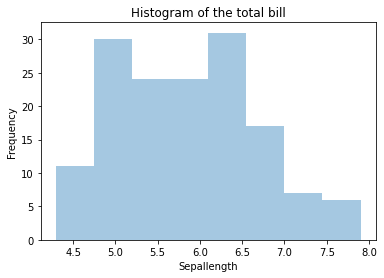

In [32]:
# Plot histogram of the total bill only
dfhist = sns.distplot(df["Sepallength"], kde = False)#.set_title("Histogram of Age")
dfhist.set_ylabel("Frequency")
dfhist.set_title("Histogram of the total bill")
plt.show()

/Users/JulianMadrid/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


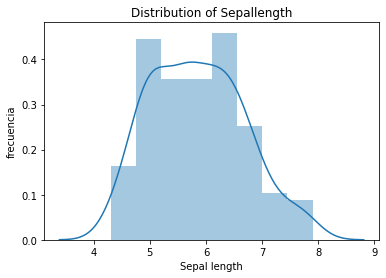

In [34]:
# Plot distribution of the tips only
dfhist = sns.distplot(df["Sepallength"], kde = True)#.set_title("Distribution of the Age")
dfhist.set_ylabel("frecuencia")
dfhist.set_xlabel("Sepal length")
dfhist.set_title("Distribution of Sepallength")

plt.show()

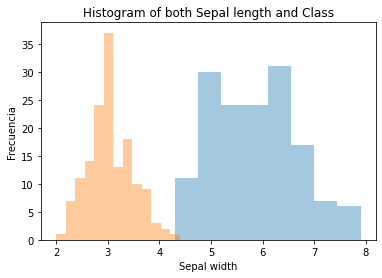

In [41]:
# Plot histogram of both the Age and the Wingspan
sns.distplot(df["Sepallength"], kde = False)
dfhist = sns.distplot(df["Sepal width"], kde = False)#.set_title("Histogram of both Age and Wingspan")
dfhist.set_ylabel("Frecuencia")
dfhist.set_title("Histogram of both Sepal length and Class")

plt.show()

# Histograms plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a histograms of one quantitative variable grouped by another categorical variables.

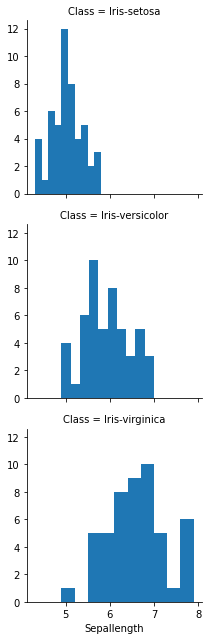

In [42]:
# Create histograms of the "Wingspan" grouped by "Gender"
g = sns.FacetGrid(df, row = "Class")
g = g.map(plt.hist, "Sepallength")

plt.show()


# Boxplots

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

/Users/JulianMadrid/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


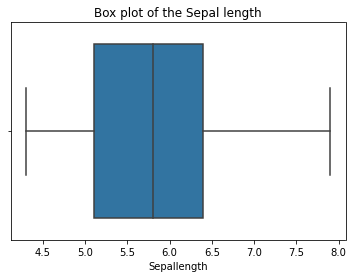

In [43]:
# Create the boxplot of the "total bill" amounts
sns.boxplot(df["Sepallength"]).set_title("Box plot of the Sepal length")
plt.show()

/Users/JulianMadrid/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


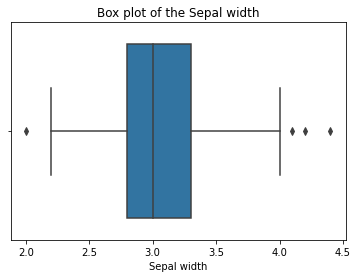

In [44]:
# Create the boxplot of the "tips" amounts
sns.boxplot(df["Sepal width"]).set_title("Box plot of the Sepal width")
plt.show()

/Users/JulianMadrid/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/JulianMadrid/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


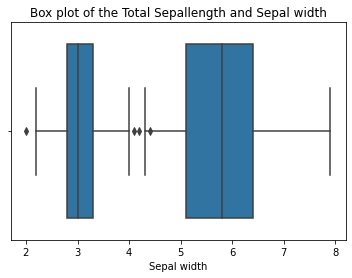

In [45]:
# Create the boxplots of the "Wingspan" and of the "Height" amounts
sns.boxplot(df["Sepallength"])
sns.boxplot(df["Sepal width"]).set_title("Box plot of the Total Sepallength and Sepal width")
plt.show()

# NOTE: this is not convenient

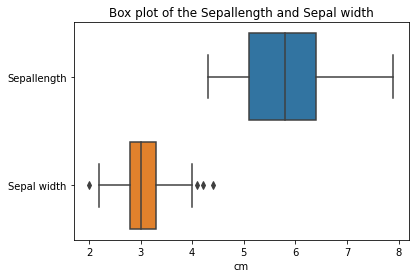

In [46]:
# Create the boxplots of the "Wingspan" and of the "tips" amounts
BillAndTip = df.loc[:, ["Sepallength", "Sepal width"]]

x2bp = sns.boxplot(data=BillAndTip, orient="h")
x2bp.set_xlabel("cm")
x2bp.set_title("Box plot of the Sepallength and Sepal width")

plt.show()

# Boxplots plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a side-by-side boxplots of one quantitative variable grouped by another categorical variables.

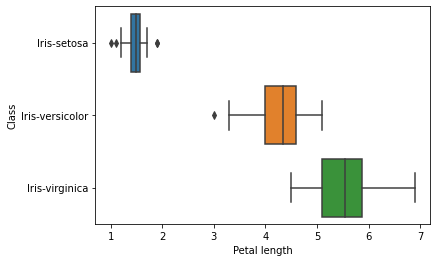

In [50]:
# Create side-by-side boxplots of the "Height" grouped by "Gender"
sns.boxplot(x = df["Petal length"], y = df["Class"])
plt.show()

# Histograms and boxplots plotted by groups

We cal also create both boxplots and histograms of one quantitative variable grouped by another categorical variables


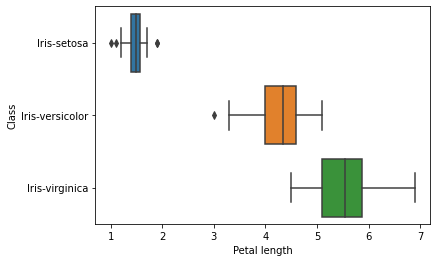

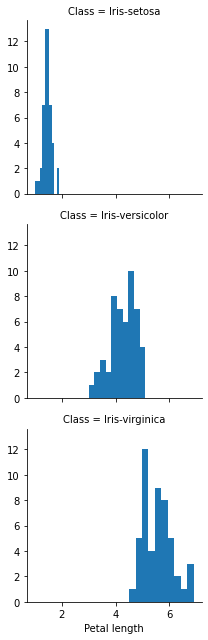

In [52]:
# Create a boxplot and histogram of the "tips" grouped by "Gender"
sns.boxplot(x = df["Petal length"], y = df["Class"])

g = sns.FacetGrid(df, row = "Class")
g = g.map(plt.hist, "Petal length")

plt.show()

# Final remarks


- Visualizing your data using **tables**, **histograms**, **boxplots**, **scatter plots** and other tools is essential to carry put analysis and extract conclusions

- There are several ways to do the same thing

- The **Seaborn** package provides visualisations tools that allow to explore data from a graphical perspective


# Activity: work with the iris dataset

Repeat this tutorial with the iris data set and respond to the following inquiries

1. Plot the histograms for each of the four quantitative variables


2. Plot the histograms for each of the quantitative variables


3. Plot the boxplots for each of the quantitative variables


4. Plot the boxplots of the petal width grouped by type of flower


5. Plot the boxplots of the setal length grouped by type of flower


6. Provide a description (explaination from your observations) of each of the quantitative variables


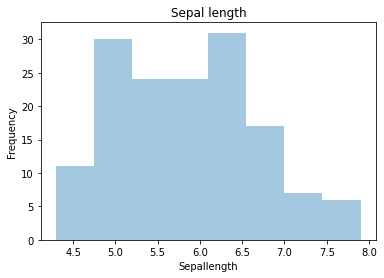

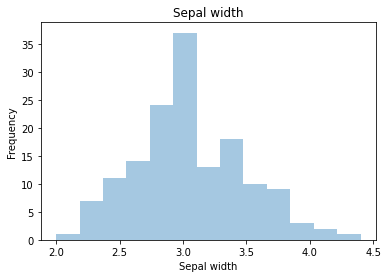

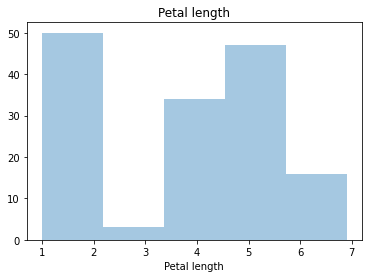

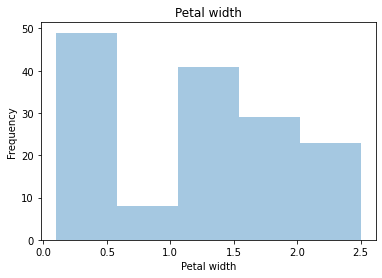

In [54]:
#Punto 1
dfhist = sns.distplot(df["Sepallength"], kde = False)
dfhist.set_ylabel("Frequency")
dfhist.set_title("Sepal length")
plt.show()

dfhist = sns.distplot(df["Sepal width"], kde = False)
dfhist.set_ylabel("Frequency")
dfhist.set_title("Sepal width")
plt.show()

dfhist = sns.distplot(df["Petal length"], kde = False)
dfhist.set_title("Petal length")
plt.show()

dfhist = sns.distplot(df["Petal width"], kde = False)
dfhist.set_ylabel("Frequency")
dfhist.set_title("Petal width")
plt.show()


/Users/JulianMadrid/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


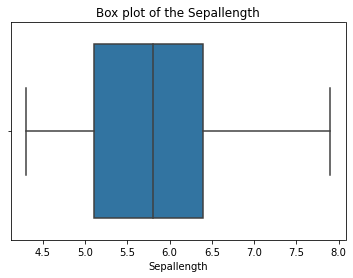

/Users/JulianMadrid/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


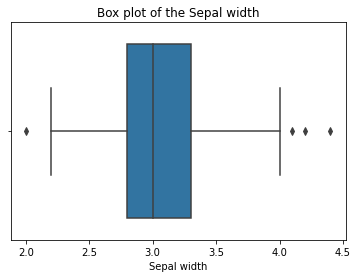

/Users/JulianMadrid/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


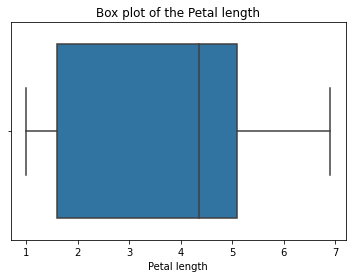

/Users/JulianMadrid/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


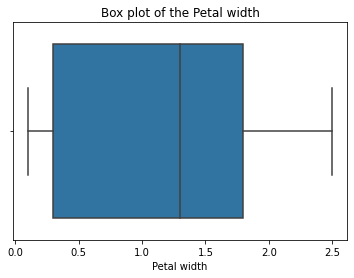

In [55]:
#Punto 3
sns.boxplot(df["Sepallength"]).set_title("Box plot of the Sepallength")
plt.show()

sns.boxplot(df["Sepal width"]).set_title("Box plot of the Sepal width")
plt.show()

sns.boxplot(df["Petal length"]).set_title("Box plot of the Petal length")
plt.show()

sns.boxplot(df["Petal width"]).set_title("Box plot of the Petal width")
plt.show()

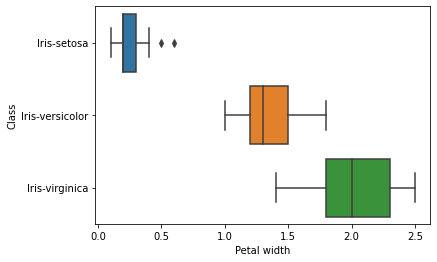

In [63]:
#Punto 4
sns.boxplot(x = df["Petal width"], y = df["Class"])
plt.show()

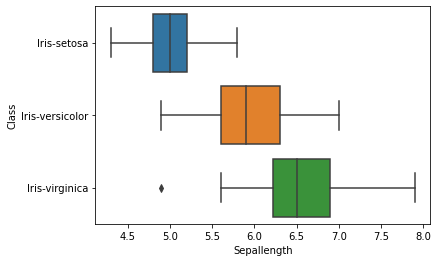

In [64]:
#Punto 5
sns.boxplot(x = df["Sepallength"], y = df["Class"])
plt.show()

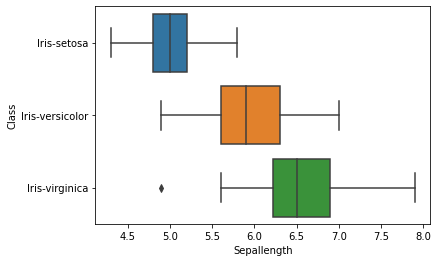

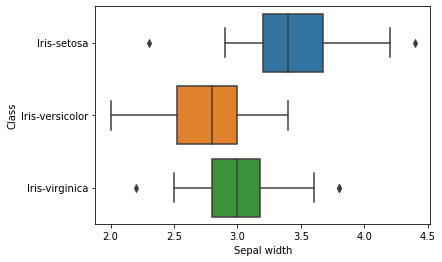

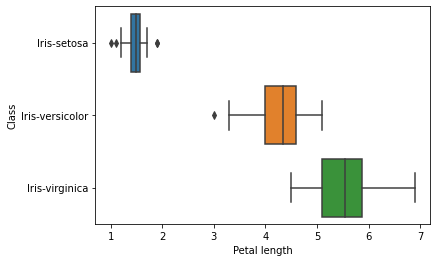

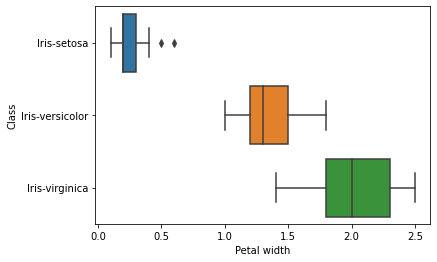

In [66]:
#Punto 6
sns.boxplot(x = df["Sepallength"], y = df["Class"])
plt.show()

sns.boxplot(x = df["Sepal width"], y = df["Class"])
plt.show()

sns.boxplot(x = df["Petal length"], y = df["Class"])
plt.show()

sns.boxplot(x = df["Petal width"], y = df["Class"])
plt.show()

Al observar las variables cuantitativas correspondientes a los 3 tipos de flores se puede concluir que la flor Iris-setosa es la mas pequeña de todas a excepcion de su Sepal width, por otro lado la Iris-Virginica es la mas grande que las demas flores exceptuando su Sepal width. La elavoración de histogramas y boxplots nos facilitan el analizis de datos, ya que nos dan un apoyo visual de como se comportan los datos con los que trabajamos.